# Pairplots in Python

In this notebook we will explore making pairplots in Python using the seaborn visualization library. We'll start with the default `sns.pairplot` and then look at customizing our plots using `sns.PairGrids`.

In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

In [18]:
# matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib

# Set text size
matplotlib.rcParams['font.size'] = 18

# Seaborn for pairplots
import seaborn as sns

sns.set_context('talk', font_scale=1.2);

# Gapminder Socioeconomic Data

We will be using [GapMinder socioeconomic data](https://cran.r-project.org/web/packages/gapminder/README.html) that is available in the R package `gapminder`. The data has been saved to a csv file which we will read into a dataframe. There are six columns in the data:

1. Country
2. Continent: useful for grouping data
3. Year: data coveres 1952-2007
4. life_exp: the life expectancy at birth 
5. pop: population
6. gdp_per_cap: the per capita (per person) GDP in [international dollars](https://en.wikipedia.org/wiki/Geary%E2%80%93Khamis_dollar)

In [19]:
df = pd.read_csv('data/gapminder_data.csv')
df.columns = ['country', 'continent', 'year', 'life_exp', 'pop', 'gdp_per_cap']
df.head()

,country,continent,year,life_exp,pop,gdp_per_cap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


We can quickly find summary stats for the data using the `describe` method of a dataframe.

In [20]:
df.describe()

,year,life_exp,pop,gdp_per_cap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165877
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846989
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


The main data transformation we will perform is to create a column showing the decade. This can be used for grouping the data and seeing how trends have changed by decade. This is easily done using the `cut` method in pandas.

In [21]:
df['decade'] = pd.cut(df['year'], bins = range(1950, 2010, 10))
df.head()

,country,continent,year,life_exp,pop,gdp_per_cap,decade
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,"(1950, 1960]"
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,"(1950, 1960]"
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,"(1960, 1970]"
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,"(1960, 1970]"
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,"(1970, 1980]"


# Default Pair Plot with All Data

Let's use the entire dataset and `sns.pairplot` to create a simple, yet useful plot. 

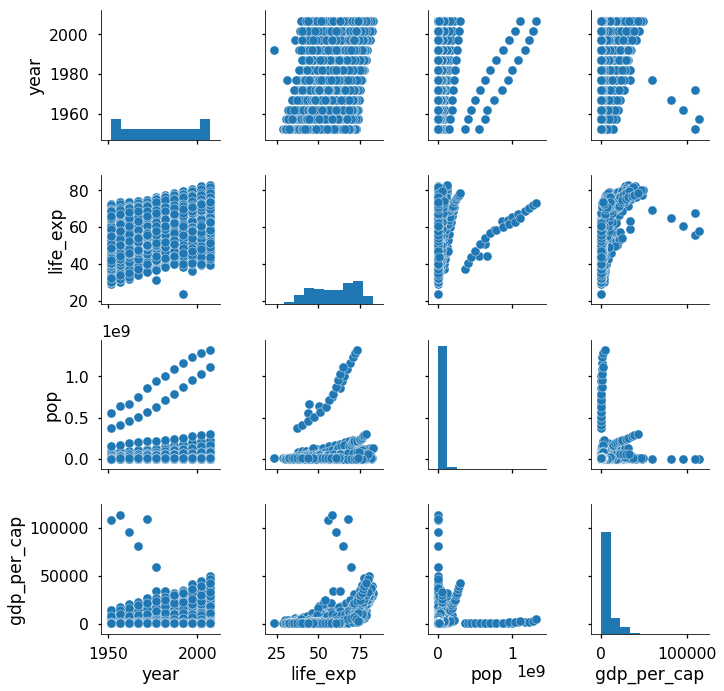

In [22]:
sns.pairplot(df);

The default pairplot shows scatter plots between variables on the upper and lower triangle and histograms along the diagonal. Already, we can see some trends such as a positive correlation between `gdp_per_cap` and `life_exp` and `year` and `life_exp` which suggests that people in richer countries live longer and that in general, people have been living longer as time increases. We can't say what causes theses trends, only that there is a correlation. 

We can also see that the distribution of `pop` and `gdp_per_cap` is heavily skewed to the right. To better represent the data, we can take the log transform of those columns. 

In [23]:
df['log_pop'] = np.log10(df['pop'])
df['log_gdp_per_cap'] = np.log10(df['gdp_per_cap'])

df_log = df.drop(columns = ['pop', 'gdp_per_cap'])

## Group and Color by a Variable

In order to better understand the data, we can color the `pairplot` using a categorical variable and the `hue` keyword. First, we will color the plots by the continent. 

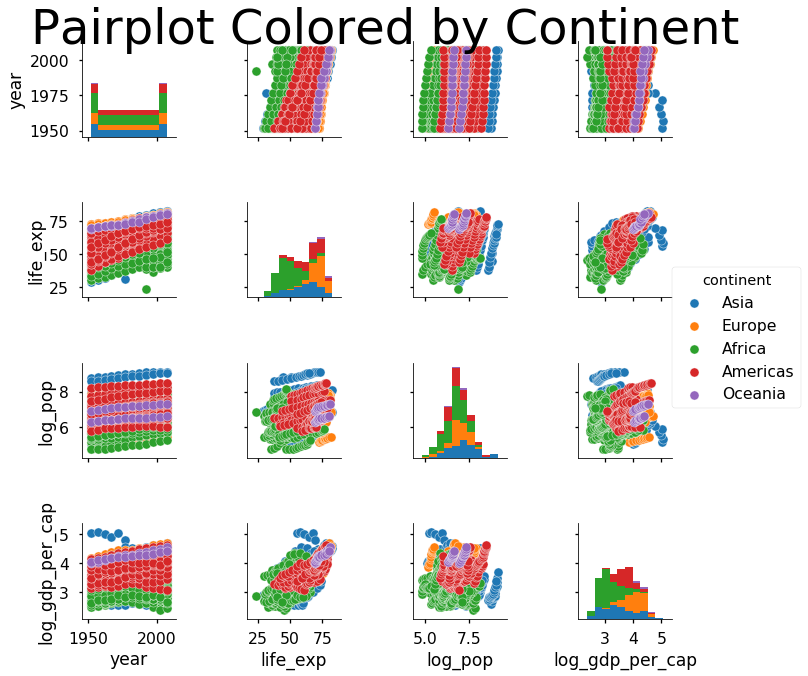

In [72]:
matplotlib.rcParams['font.size'] = 40
sns.pairplot(df_log, hue = 'continent');
plt.suptitle('Pairplot Colored by Continent');

I don't find stacked histograms (on the diagonal) to be very useful, and there are some issues with overlapping data points (known as overplotting). We can fix these by adding in a few customizations to the `pairplot` call. 

## Customizing `pairplot`

First, let's change the diagonal from a histogram to a kde which can better show the differences between continents. We can also adjust the alpha (intensity) of the scatter plots to better show all the data and change the size of the markers on the scatter plot. Finally, I increase the size of all the plots to better show the data.

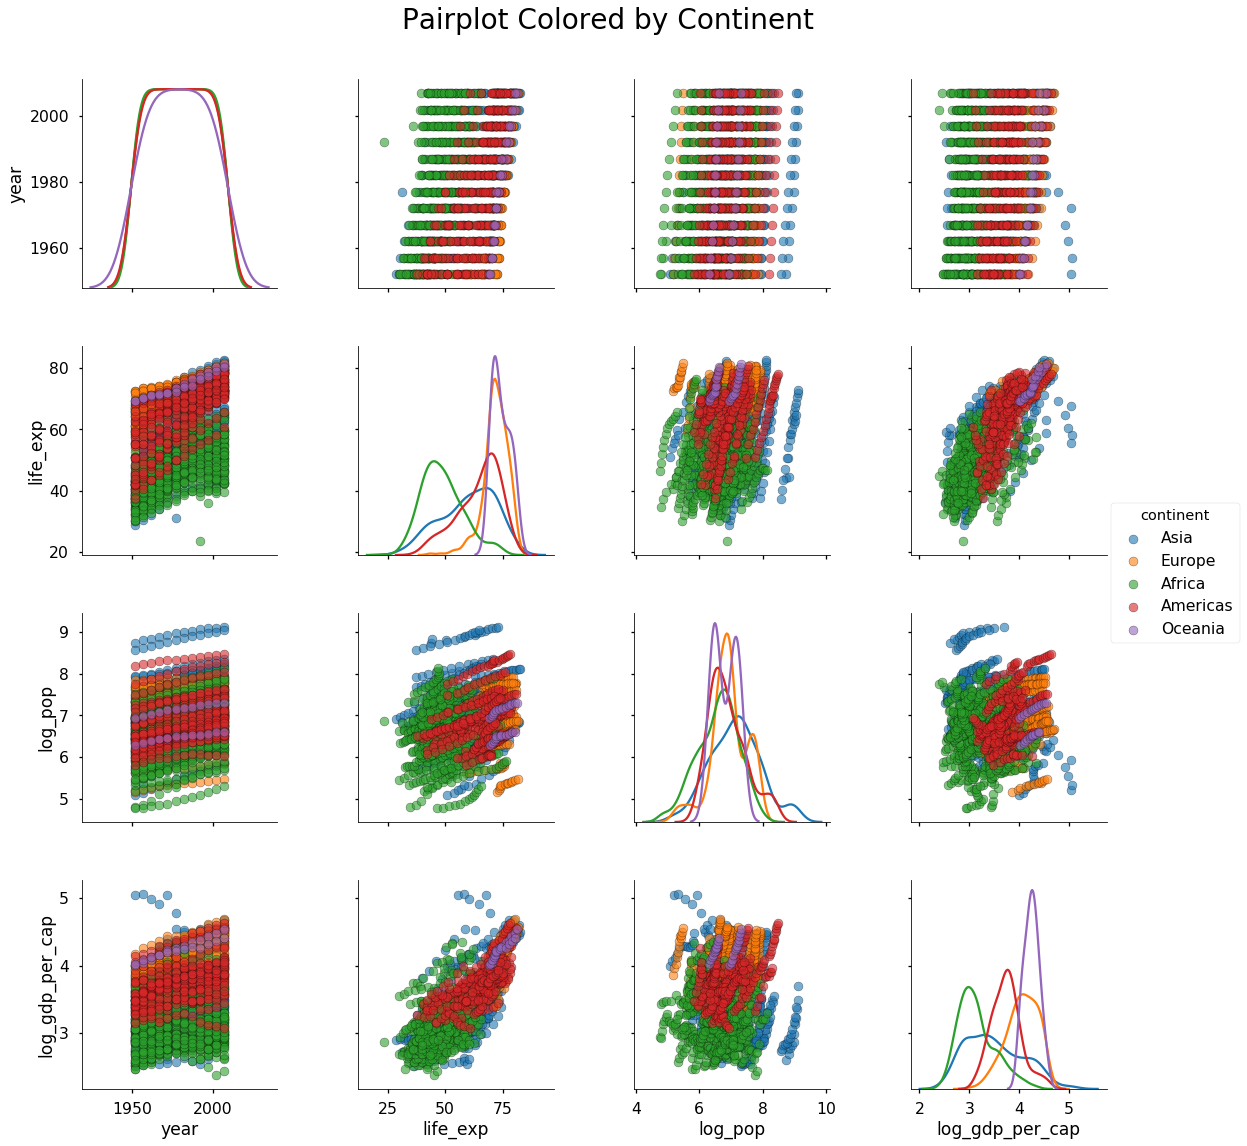

In [87]:
sns.pairplot(df_log, hue = 'continent', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4);
plt.suptitle('Pairplot Colored by Continent', size = 28, y = 1.02);

That makes some of the trends more clear. We can see that Oceania and Europe tend to have the highest life expectancy and highest GDP with Asian countries tending to have the greatest population. The density plots on the diagonal are better for when we have data in multiple categories to make comparisons. We can color the plot by any variable we like. For example, here is a plot colored by the decade categorical variable we created earlier. 

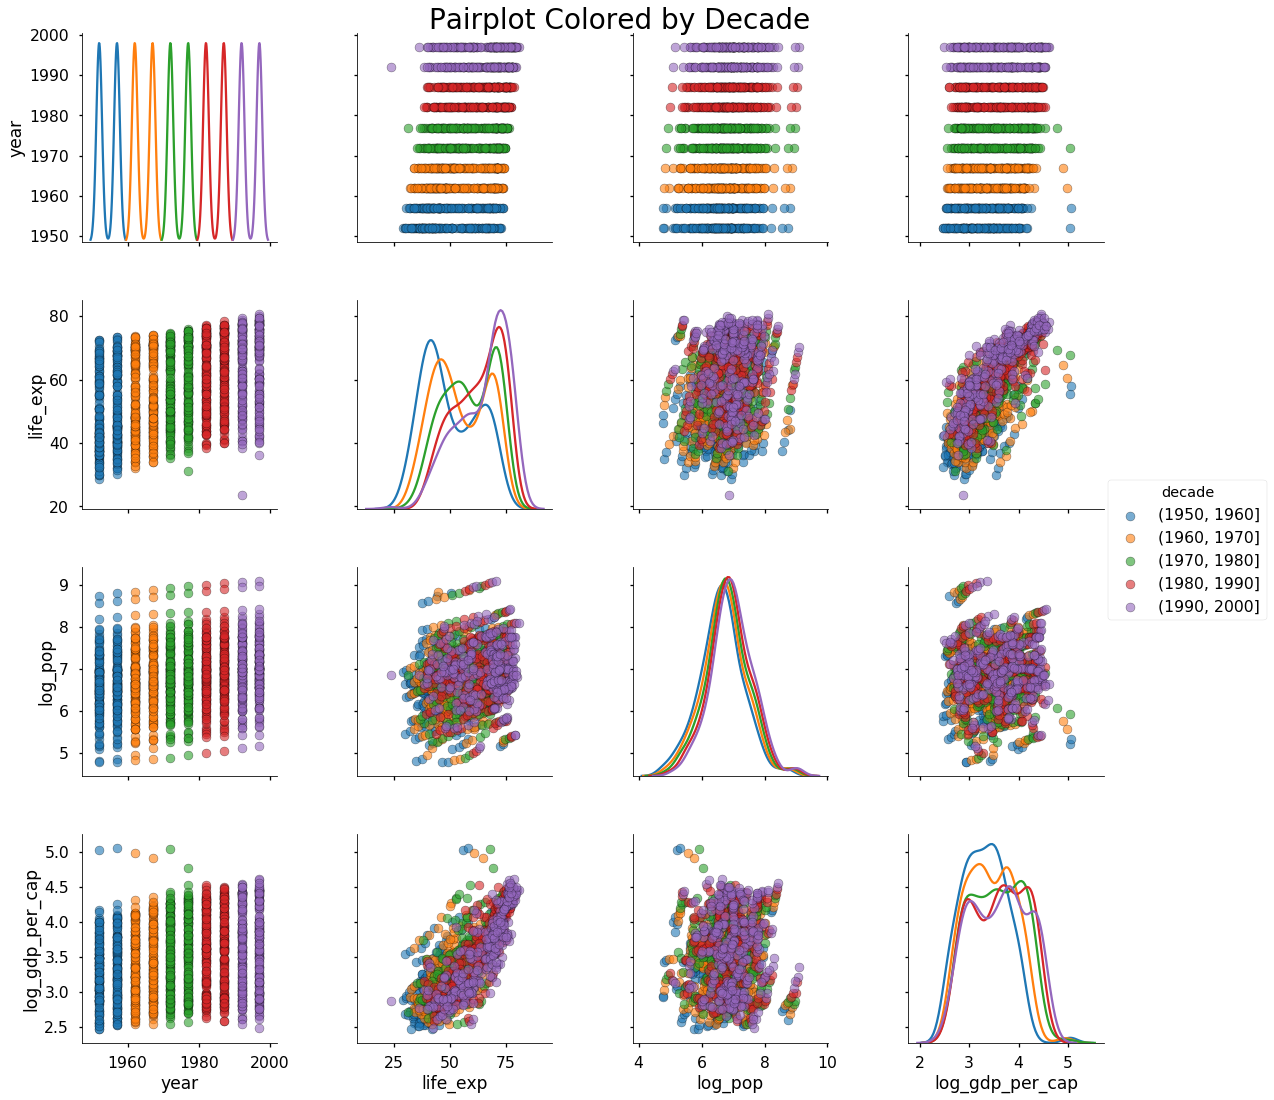

In [73]:
sns.pairplot(df_log, hue = 'decade', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4);
plt.suptitle('Pairplot Colored by Decade', size = 28);

In this case, we can know see that life expectancy has increased over the decades as has population. Retaining the year variable might not make much sense when we are already coloring by the decade.

There is still quite a lot of noise on the scatter plots, mostly because we are plotting many years at once. Let's limit ourselves to the most recent year in the data. Notice how we must now use the `vars` keyword to specify the variables we want to plot. It does not make sense to plot the year variable since it no longer varies. We will limit the plot to the three remaining numerical variables. 

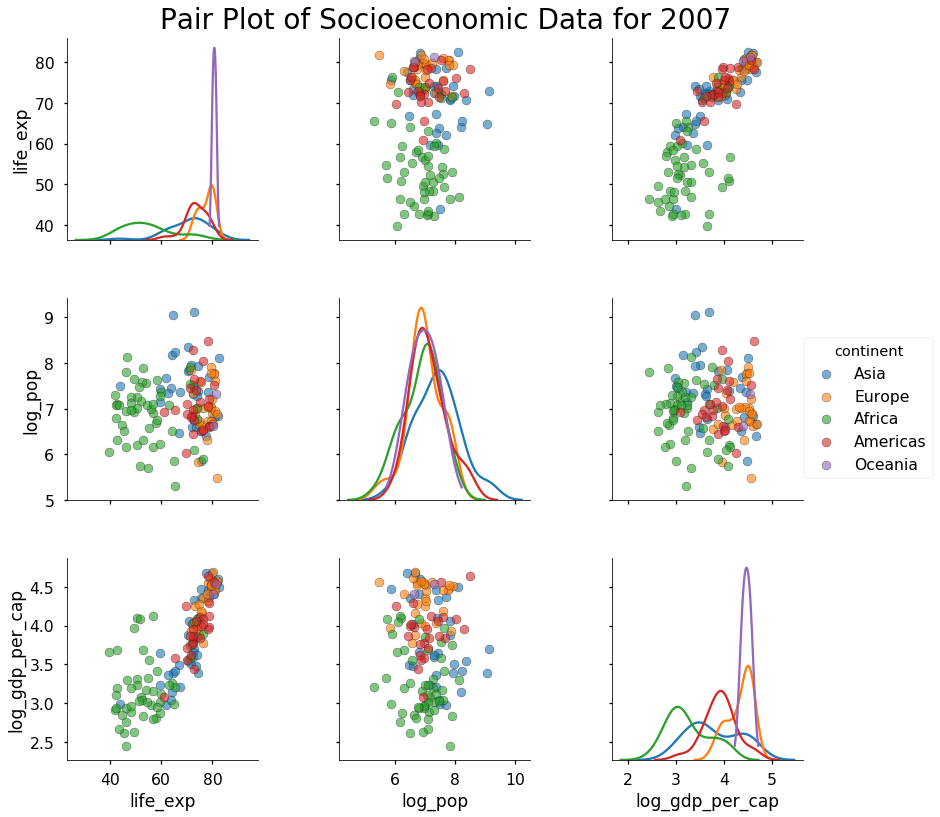

In [74]:
sns.pairplot(df_log[df_log['year'] == 2007], vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], 
             hue = 'continent', diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, size = 4);
plt.suptitle('Pair Plot of Socioeconomic Data for 2007', size = 28);

# More Customization with `sns.PairGrid` 

When the options offered by pairplot are not enough, we can move on to more powerful PairGrid. This allows us to define our own functions to map to the lower and upper triangles and the diagonal. For example, we might want a plot that instead of showing two instaces of the scatter plots, shows the [Pearson Correlation coefficient](http://www.statisticshowto.com/probability-and-statistics/correlation-coefficient-formula/) (a measure of a linear trend) on one of the triangles. To do this, we can just write a function to calculate the statistic and then map it to the appropriate part of the plot.

First, we will show the basic usage of `sns.PairGrid`. Here, we map a scatter plot to the upper triangle, a density plot to the diagonal, and a 2D density plot to the lower triangle. `PairGrid` is a class and not a function, which means that we need to create an instance and then use methods of that instance to build a plot. Then, after we have added all the methods to the instance, we can show the resulting plot.

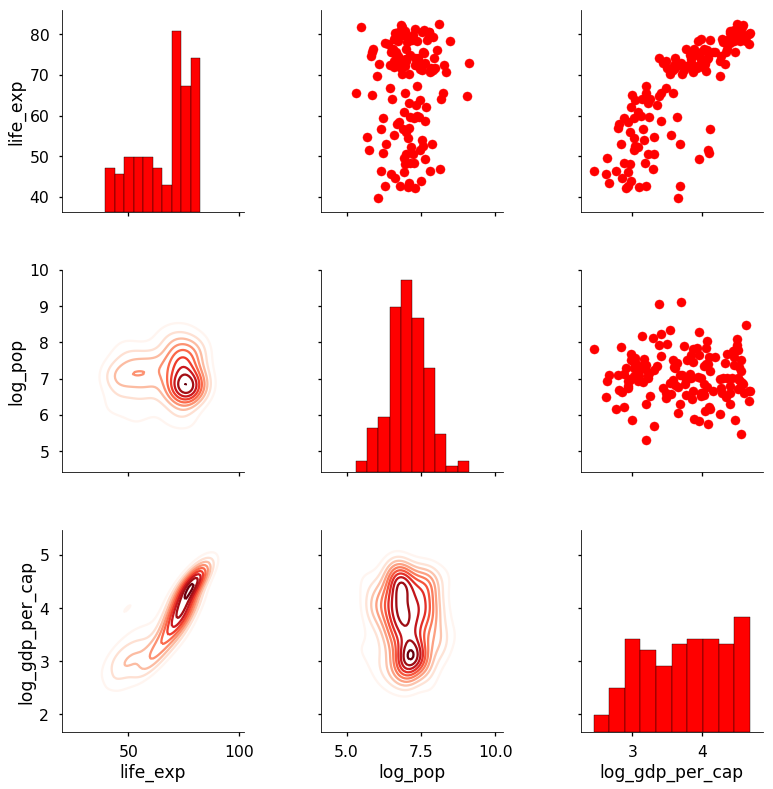

In [119]:
# Create an instance of the PairGrid class.
grid = sns.PairGrid(data= df_log[df_log['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], size = 4)
grid = grid.map_upper(plt.scatter, color = 'red')
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, color = 'red', edgecolor = 'k');

Now that we see how to map different functions to the different elements, we can write out own function to put on the plot. We'll use a simple function to show the correlation coffient on the lower triangle. [Thanks to this Stack Overflow answer!](https://stackoverflow.com/questions/30942577/seaborn-correlation-coefficient-on-pairgrid) 

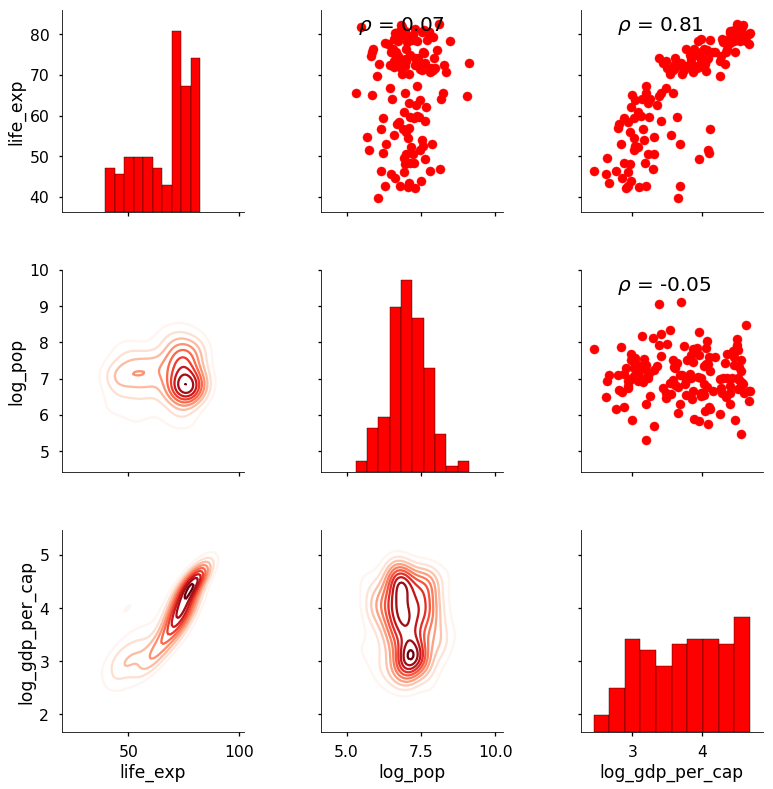

In [117]:
def corr(x, y, **kwargs):
    label = r'$\rho$ = ' + str(round((np.corrcoef(x, y)[0][1]), 2))
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.9), size = 20, xycoords = ax.transAxes)
    
grid = sns.PairGrid(data= df_log[df_log['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], size = 4)

grid = grid.map_upper(plt.scatter, color = 'red')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(plt.hist, bins = 10, edgecolor =  'k', color = 'red');

We can map any function we would like to any of the areas. For example, maybe we would like to show the summary stats on the diagonal.

In [147]:
x  = pd.Series(df_log.log_gdp_per_cap)
y = pd.Series(x.describe()[['mean', 'std', 'min', '50%', 'max']])

In [148]:
10 ** y

mean      3493.958640
std          3.459637
min        241.165877
50%       3531.846799
max     113523.132900
Name: log_gdp_per_cap, dtype: float64

In [156]:
pd.DataFrame(y)

,log_gdp_per_cap
mean,3.543318
std,0.539031
min,2.382316
50%,3.548002
max,5.055084


In [155]:
import pprint
pprint.pprint(y.to_string())

('mean    3.543318\n'
 'std     0.539031\n'
 'min     2.382316\n'
 '50%     3.548002\n'
 'max     5.055084')


In [153]:
labels = [print(name, value) for name, value in zip(y.index, y.values)]

mean 3.5433177596257055
std 0.5390305744958339
min 2.382315857795856
50% 3.548001856914132
max 5.055084367847655


[None, None, None, None, None]

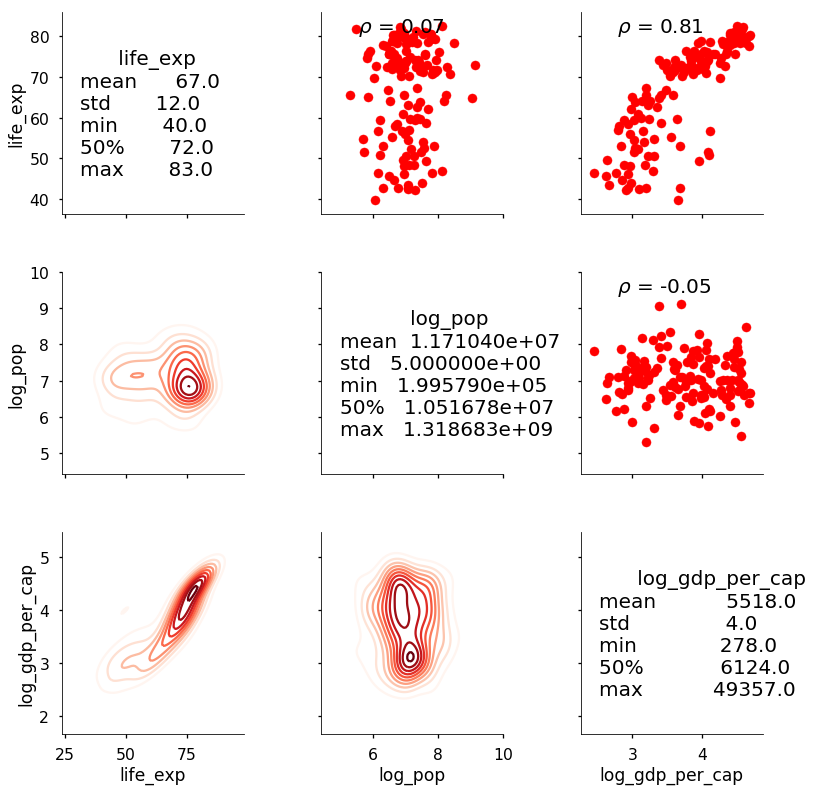

In [159]:
def summary(x, **kwargs):
    x = pd.Series(x)
    label = x.describe()[['mean', 'std', 'min', '50%', 'max']]
    
    if 'log' in label.name:
        label = 10 ** label
        
    label = label.round()
    ax = plt.gca()
    
    ax.annotate(pd.DataFrame(label),
               xy = (0.1, 0.2), size = 20, xycoords = ax.transAxes)

grid = sns.PairGrid(data= df_log[df_log['year'] == 2007],
                    vars = ['life_exp', 'log_pop', 'log_gdp_per_cap'], size = 4)

grid = grid.map_upper(plt.scatter, color = 'red')
grid = grid.map_upper(corr)
grid = grid.map_lower(sns.kdeplot, cmap = 'Reds')
grid = grid.map_diag(summary);